# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [168]:
df = pd.read_csv('./Data/Salary_Data.csv',index_col=None) 
X=df['YearsExperience'].values
y=df['Salary'].values
X_train_lnr , X_test_lnr , y_train_lnr , y_test_lnr = train_test_split(X,y,test_size=0.2,random_state=7)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [169]:
#we use formula y = mx+c to find a regression line to use in our model.
#to find the value of m and c 


#fitting the model.
form_ne = 0
from_de = 0
mean_x = X_train_lnr.mean()
mean_y = y_train_lnr.mean()
for i in range(len(X_train_lnr)):
    form_ne+=((X_train_lnr[i]-mean_x)*(y_train_lnr[i]-mean_x))
    from_de+=pow((X_train_lnr[i]-mean_x),2)
m = form_ne/from_de
c=mean_y - mean_x*m

#predicting the result using the model.
pred_res_lr_wogd = []
for i in range((len(X_test_lnr))):
    res = (m*(X_test_lnr[i]))+c
    pred_res_lr_wogd.append(round(res,4))

print('actual:', y_test_lnr)
print('predicted:', pred_res_lr_wogd)
print(m,c)

actual: [37731. 83088. 46205. 57189. 55794. 56642.]
predicted: [39296.222, 75602.4336, 37385.3688, 60315.6077, 63181.8875, 52672.1947]
9554.266203095416 24964.822717686453


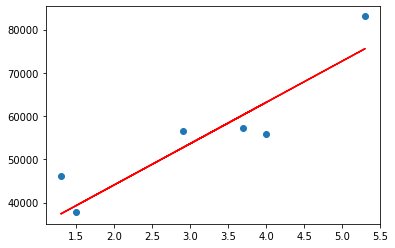

In [170]:
plt.scatter(X_test_lnr,y_test_lnr)
plt.plot(X_test_lnr,pred_res_lr_wogd,c='red')
plt.show()

In [171]:
df = pd.read_csv('./Data/Salary_Data.csv',index_col=None) 

#Standardization of the given dataset
for i in range(df.shape[1]):
    df.iloc[:,i] = (df.iloc[:,i] - np.mean(df.iloc[:,i]))/np.std(df.iloc[:,i])
X=df['YearsExperience'].values
X= X.reshape(-1, 1)
y=df['Salary'].values
y = y.reshape(-1, 1)

X_train_lnr_wgd , X_test_lnr_wgd , y_train_lnr_wgd , y_test_lnr_wgd = train_test_split(X,y,test_size=0.2,random_state=7)

class LinearRegressor:
    def __init__(self, lr=0.001, itr=10000):
        self.lr = lr
        self.itr = itr
        self.w = 0
        self.b = 0

    def fit(self, X, y):
        nosamples, nofeatures = X.shape
        self.w = np.zeros((nofeatures, 1))

        for i in range(self.itr):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1/nosamples) * np.dot(X.T, (y_pred - y))
            db = (1/nosamples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        res = np.dot(X, self.w) + self.b
        return res
    

model = LinearRegressor()
model.fit(X_train_lnr_wgd, y_train_lnr_wgd)

pred_res_lr_wgd = model.predict(X_test_lnr_wgd)
print('actual:', y_test_lnr_wgd)
print('predicted:', pred_res_lr_wgd)

actual: [[-1.419919  ]
 [ 0.26285865]
 [-1.10552744]
 [-0.69801306]
 [-0.74976858]
 [-0.71830716]]
predicted: [[-1.36153327]
 [-0.0147246 ]
 [-1.43241793]
 [-0.58180193]
 [-0.47547494]
 [-0.8653406 ]]


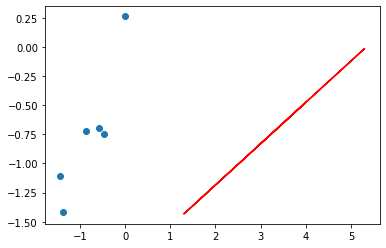

In [172]:
plt.scatter(X_test_lnr_wgd,y_test_lnr_wgd)
plt.plot(X_test_lnr,pred_res_lr_wgd,c='red')
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [173]:
# for Logistic regression
df = pd.read_csv('./Data/Salary_Data.csv',index_col=None) 
df['Salary<60000'] = [1 if i<60000 else 0 for i in df['Salary']]
df = df.drop(['Salary'],axis=1)
Y = np.array(df['Salary<60000'])
Y = Y.reshape(-1, 1)
X = np.array(df['YearsExperience'])
X= X.reshape(-1, 1)
X_train_log, X_test_log , y_train_log , y_test_log = train_test_split(X,Y,test_size=0.2,random_state=7,stratify=Y)



#building a logistic Regression model.
class LogisticRegressor:
    def __init__(self, lr=0.01, itr=100000):
        self.lr = lr
        self.itr = itr
        self.w = 0
        self.b = 0
    def Sigmoid(self, ip):
        return 1/(1+np.exp(-ip))

    def fit(self, X, y):
        nosamples, nofeatures = X.shape
        self.w = np.zeros((nofeatures, 1))
        
        for i in range(self.itr):
            y_pred = self.Sigmoid(np.dot(X, self.w) + self.b)
            dw = (1/nosamples) * np.dot(X.T, (y_pred - y))
            db = (1/nosamples) * np.sum(y_pred - y)

            # update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        res = self.Sigmoid(np.dot(X, self.w) + self.b)
        res = [1 if i[0]>=0.5 else 0 for i in res]
        return res

model = LogisticRegressor()
model.fit(X_train_log, y_train_log)

pred_res_log_wgd = model.predict(X_test_log)
print(pred_res_log_wgd , y_test_log)

[1, 1, 0, 0, 0, 0] [[1]
 [1]
 [0]
 [0]
 [0]
 [0]]


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [174]:
from sklearn.metrics import r2_score

y_test_lnr = np.array(y_test_lnr)
pred_res_lr_wogd = np.array(pred_res_lr_wogd)
pred_res_lr_wgd = np.array(pred_res_lr_wgd)



print(f'R2 Score for linear regression without gradient decent: {r2_score(y_test_lnr,pred_res_lr_wogd)}')

print(f'R2 Score for linear regression with gradient decent: {r2_score(y_test_lnr_wgd,pred_res_lr_wgd)}')

print(f'MAE Score for linear regression without gradient decent: {np.mean(np.abs(y_test_lnr - pred_res_lr_wogd ))}')

print(f'MAE Score for linear regression with gradient decent: {np.mean(np.abs(y_test_lnr_wgd - pred_res_lr_wgd ))}')

print(f'RMSE Score for linear regression without gradient decent: {np.sqrt(np.mean(np.abs(y_test_lnr - pred_res_lr_wogd )**2))}') 

print(f'RMSE Score for linear regression with gradient decent: {np.sqrt(np.mean(np.abs(y_test_lnr_wgd - pred_res_lr_wgd )**2))}')

R2 Score for linear regression without gradient decent: 0.8143022788939154
R2 Score for linear regression with gradient decent: 0.8144064750795932
MAE Score for linear regression without gradient decent: 5392.45335
MAE Score for linear regression with gradient decent: 0.20006628007768587
RMSE Score for linear regression without gradient decent: 6005.350812461195
RMSE Score for linear regression with gradient decent: 0.22274035984583127


In [175]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score for Logistic regression with gradient decent: {accuracy_score(y_test_log,pred_res_log_wgd)}')

Accuracy Score for Logistic regression with gradient decent: 1.0
